### Handle Imports

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt

## Load the CIFAR10 data set

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [0]:
# One-Hot Encode labels
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Underfitting Model

### Build CNN

Note: This model's architecture is greatly exaggerated to produce a very simplistic model that underfits the data.

In [0]:
# Set up the layers
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 86us/step - loss: 1.9585 - acc: 0.2939 - val_loss: 1.7444 - val_acc: 0.3892
Epoch 2/20
50000/50000 [==============================] - 1s 26us/step - loss: 1.6737 - acc: 0.4149 - val_loss: 1.6004 - val_acc: 0.4418
Epoch 3/20
50000/50000 [==============================] - 1s 26us/step - loss: 1.5767 - acc: 0.4510 - val_loss: 1.5340 - val_acc: 0.4649
Epoch 4/20
50000/50000 [==============================] - 1s 26us/step - loss: 1.5036 - acc: 0.4758 - val_loss: 1.4552 - val_acc: 0.4929
Epoch 5/20
50000/50000 [==============================] - 1s 25us/step - loss: 1.4139 - acc: 0.5043 - val_loss: 1.3883 - val_acc: 0.5165
Epoch 6/20
50000/50000 [==============================] - 1s 27us/step - loss: 1.3535 - acc: 0.5239 - val_loss: 1.3195 - val_acc: 0.5366
Epoch 7/20
50000/50000 [==============================] - 1s 26us/step - loss: 1.3001 - acc: 0.5434 - val_loss: 1.3069 - val_acc

### Evaluate Accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 70us/step
Test accuracy: 0.6062


### Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

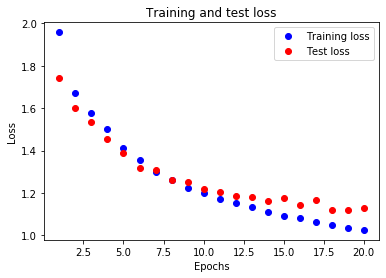

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

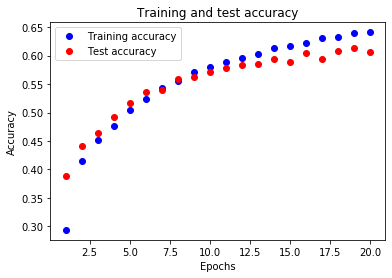

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As seen above, the model greatly underperforms on the testing and training data. This shows the model is underfitting.

## Overfitting Model

### Build CNN

In [0]:
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, 
          batch_size=512, epochs=epochs, 
          validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 9s 237us/step - loss: 1.7295 - acc: 0.3960 - val_loss: 1.3582 - val_acc: 0.5145
Epoch 2/20
40000/40000 [==============================] - 6s 151us/step - loss: 1.2293 - acc: 0.5652 - val_loss: 1.4258 - val_acc: 0.5181
Epoch 3/20
40000/40000 [==============================] - 6s 151us/step - loss: 1.0585 - acc: 0.6277 - val_loss: 1.0639 - val_acc: 0.6287
Epoch 4/20
40000/40000 [==============================] - 6s 151us/step - loss: 0.9333 - acc: 0.6743 - val_loss: 0.9741 - val_acc: 0.6639
Epoch 5/20
40000/40000 [==============================] - 6s 152us/step - loss: 0.8379 - acc: 0.7065 - val_loss: 0.9410 - val_acc: 0.6726
Epoch 6/20
40000/40000 [==============================] - 6s 151us/step - loss: 0.7429 - acc: 0.7394 - val_loss: 0.9131 - val_acc: 0.6915
Epoch 7/20
40000/40000 [==============================] - 6s 151us/step - loss: 0.6482 - acc: 0.7768 - val_loss: 0.9107 - 

### Evaluate Accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 110us/step
Test accuracy: 0.703


### Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

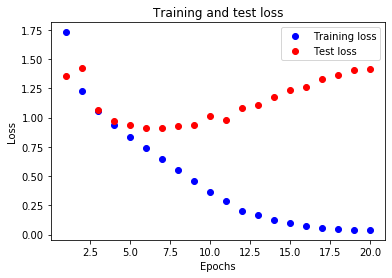

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

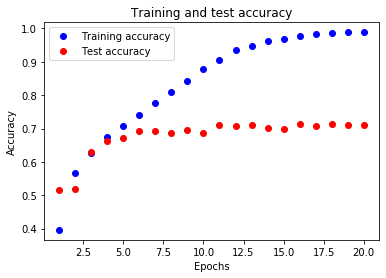

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As seen by the massive gap between testing and training accuracy, the model is severely overfitting to the training data. Part of this is due to a lack of any Dropout layers in the model.

## Decent Model

### Build CNN

In [0]:
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, 
          batch_size=512, epochs=20, 
          validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 20s 499us/step - loss: 2.2892 - acc: 0.1179 - val_loss: 2.1668 - val_acc: 0.1770
Epoch 2/20
40000/40000 [==============================] - 15s 383us/step - loss: 1.9342 - acc: 0.2562 - val_loss: 1.7420 - val_acc: 0.3470
Epoch 3/20
40000/40000 [==============================] - 15s 383us/step - loss: 1.5975 - acc: 0.4102 - val_loss: 1.3897 - val_acc: 0.4909
Epoch 4/20
40000/40000 [==============================] - 15s 383us/step - loss: 1.3342 - acc: 0.5166 - val_loss: 1.1510 - val_acc: 0.5826
Epoch 5/20
40000/40000 [==============================] - 15s 383us/step - loss: 1.1395 - acc: 0.5918 - val_loss: 1.0339 - val_acc: 0.6374
Epoch 6/20
40000/40000 [==============================] - 15s 383us/step - loss: 1.0237 - acc: 0.6349 - val_loss: 1.0110 - val_acc: 0.6508
Epoch 7/20
40000/40000 [==============================] - 15s 382us/step - loss: 0.9060 - acc: 0.6800 - val_loss: 0.

### Evaluate Accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 222us/step
Test accuracy: 0.8233


### Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, 20+1)

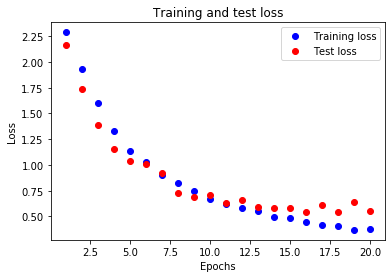

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

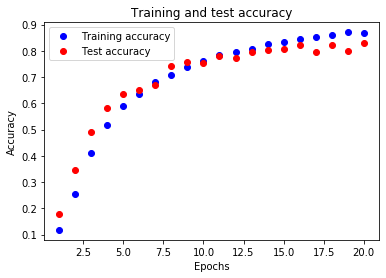

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This model has a very small gap between the training and testing scores. This indicates that the model is not overfitting.

The addition of more Dropout layers has helped fight overfitting. More hidden layers and convolutional layers has also increased the accuracy of the model as a whole.

The testing score has also seen roughly a 12% improvement over the overfitting model. It is also roughly a 22% improvement over the underfitting model. It could still potentially be improved with more hidden layers (as long as they are balanced by Dropout layers) or by training for more epochs.